In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
color_pal=sns.color_palette()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import prophet as Prophet
from prophet.plot import add_changepoints_to_plot 
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

In [2]:
df=pd.read_csv('onlinesale.csv',low_memory=False)
df.head()

,LastestCall,Subject,CRMCampaign,CalledPhone,Timepercall,CallStatus,CallOutcomereason,City,TotalAmount,Brand,BrandSwitchReason
0,7/6/2023 14:55,202307 - MiniApp Order,202307 - MiniApp Order,933323026.0,1 lần - Final,Completed,Loyalty,Ninh Bình,2565000,Online-GLU,S07
1,7/6/2023 18:12,202307 - MiniApp Order,202307 - MiniApp Order,911250769.0,1 lần - Final,Completed,Loyalty,Bình Dương,1710000,Online-GLU,S07
2,7/6/2023 18:10,202307 - MiniApp Order,202307 - MiniApp Order,982824889.0,1 lần - Final,Completed,Loyalty,Bình Định,1710000,Online-GLU,S07
3,7/6/2023 18:08,202307 - MiniApp Order,202307 - MiniApp Order,945221722.0,1 lần - Final,Completed,Loyalty,Hồ Chí Minh,1602000,Online-GLU,S07
4,7/6/2023 16:30,Online_GLU_External Source,Online_GLU_External Source,909574274.0,1 lần - Final,Completed,Loyalty,Hồ Chí Minh,1602000,Online-GLU,S07


In [3]:
df.shape

(82000, 11)

In [4]:
df=df[df['CallStatus']=='Completed']
features=['LastestCall','TotalAmount']
new_df=df[features]
new_df['LastestCall']=pd.to_datetime(new_df['LastestCall']).dt.date

C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\2438439330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LastestCall']=pd.to_datetime(new_df['LastestCall']).dt.date


In [5]:
new_df.head()

,LastestCall,TotalAmount
0,2023-07-06,2565000
1,2023-07-06,1710000
2,2023-07-06,1710000
3,2023-07-06,1602000
4,2023-07-06,1602000


In [6]:
#new_df[new_df['LastestCall']==new_df.LastestCall[0]]
# Basic formula: np.sum(new_df[new_df["LastestCall"]==day_df['Date'][0]].TotalAmount)
day_df=pd.DataFrame()
day_df['Date']=new_df['LastestCall'].unique()
day_df['SumDay']=0
for i in range(len(day_df)):
    day_df.SumDay[i]=np.sum(new_df[new_df["LastestCall"]==day_df['Date'][i]].TotalAmount)
day_df.head()

C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\80638509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df.SumDay[i]=np.sum(new_df[new_df["LastestCall"]==day_df['Date'][i]].TotalAmount)


,Date,SumDay
0,2023-07-06,314314000
1,2023-07-05,203742000
2,2023-07-04,266953000
3,2023-07-03,325047000
4,2023-07-01,236404000


In [7]:
plot_params= {'color': '0.75',
 'style': '.-',
 'markeredgecolor': '0.25',
 'markerfacecolor': '0.25',
 'legend': False}

[Text(0.5, 1.0, 'Abbott Sales Over Time')]

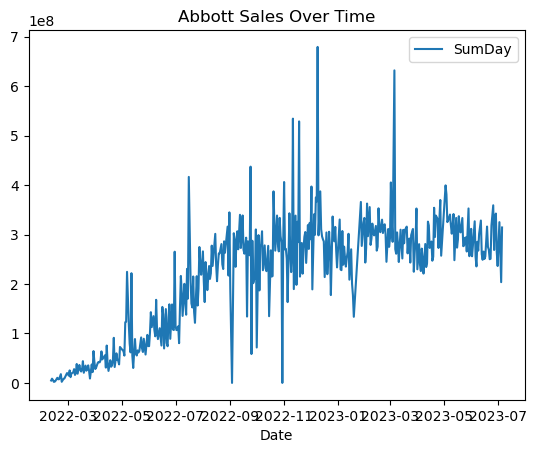

In [8]:
ax=day_df.plot.line(x='Date')
ax.set(title='Abbott Sales Over Time')

In [9]:
# OUTLIER REMOVAL
day_df = day_df.query('SumDay<370000000').copy()

## START MODELING: https://www.youtube.com/watch?v=vV12dGe_Fho


In [10]:
df=day_df
df.head()

,Date,SumDay
0,2023-07-06,314314000
1,2023-07-05,203742000
2,2023-07-04,266953000
3,2023-07-03,325047000
4,2023-07-01,236404000


In [11]:
df=df.set_index('Date')


In [12]:
df.index= pd.to_datetime(df.index)
df.index

DatetimeIndex(['2023-07-06', '2023-07-05', '2023-07-04', '2023-07-03',
               '2023-07-01', '2023-06-30', '2023-06-29', '2023-06-28',
               '2023-06-27', '2023-06-26',
               ...
               '2022-02-19', '2022-02-18', '2022-02-17', '2022-02-16',
               '2022-02-15', '2022-02-14', '2022-02-13', '2022-02-12',
               '2022-02-11', '2022-02-10'],
              dtype='datetime64[ns]', name='Date', length=415, freq=None)

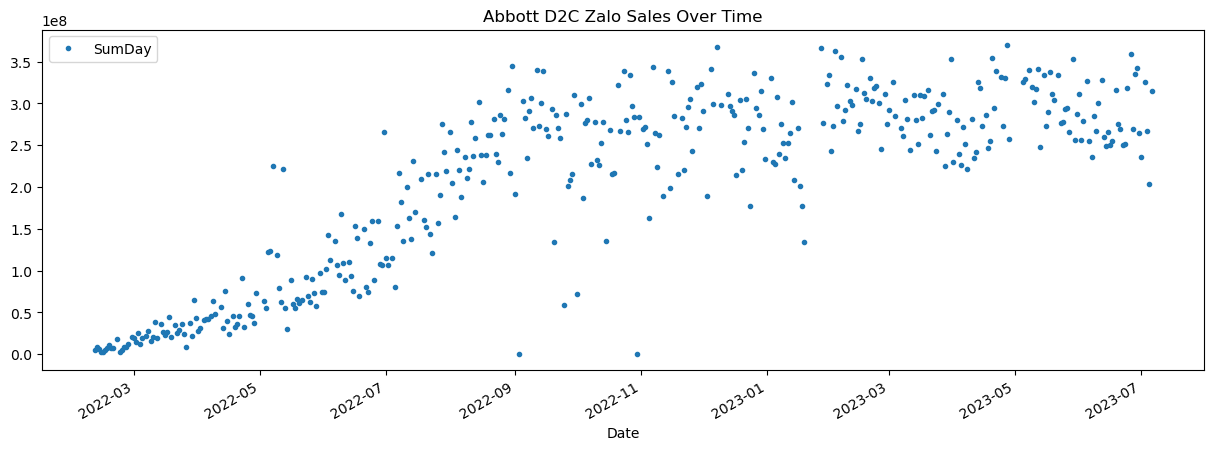

In [13]:
df.plot(style='.',figsize=(15,5),color=color_pal[0],title='Abbott D2C Zalo Sales Over Time')
plt.show()

<Axes: ylabel='Frequency'>

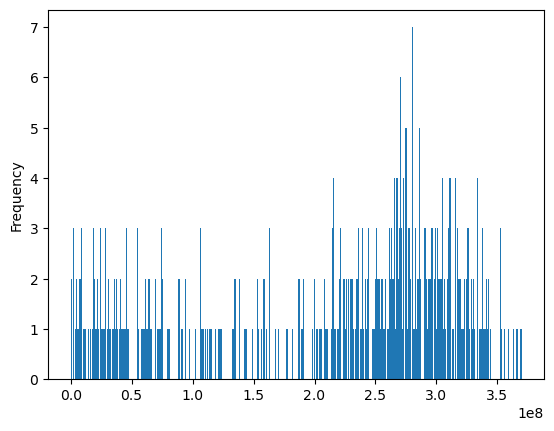

In [14]:
df['SumDay'].plot(kind='hist',bins=400)


0


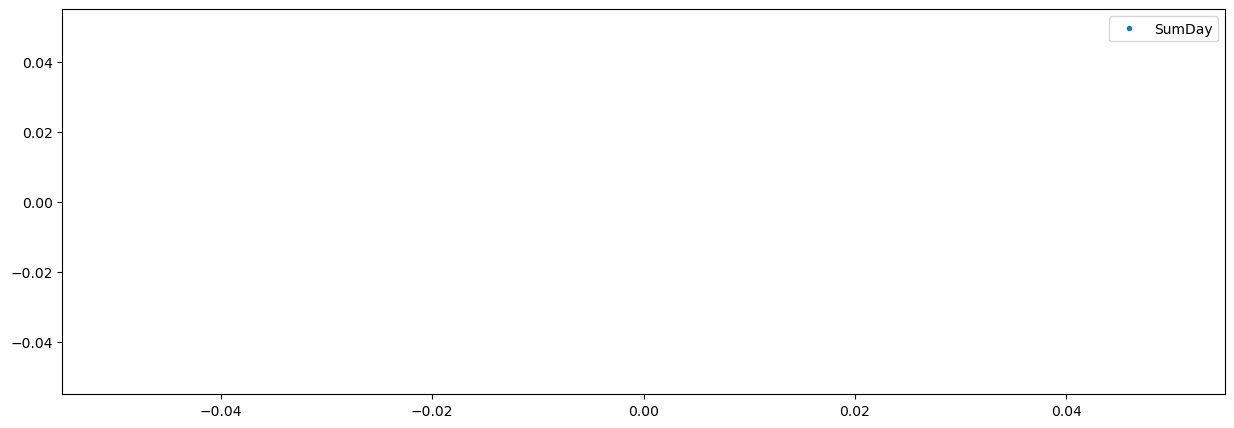

In [15]:
day_df.query('SumDay>370000000').plot(figsize=(15,5),style='.')
print(len(day_df.query('SumDay>370000000')))

In [16]:
df.tail(130)

,SumDay
Date,
2022-07-13,137926000
2022-07-12,163386500
2022-07-11,200365500
2022-07-09,135484000
2022-07-08,181816500
...,...
2022-02-14,2496756
2022-02-13,2237560
2022-02-12,5990040


## TRAIN TEST SPLIT 

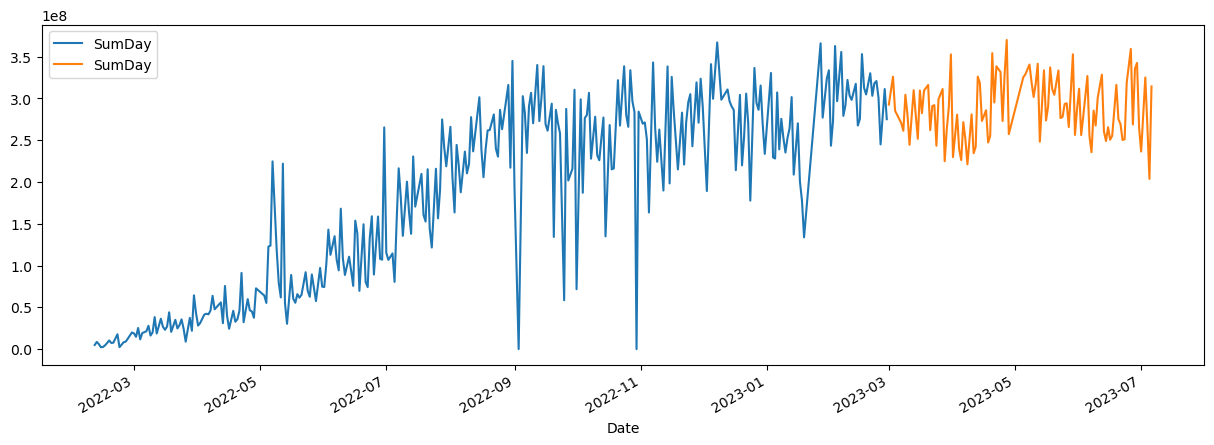

In [17]:
# 75:25 test split 
train = df.loc[df.index < '2023-03']
test = df.loc[df.index >= '2023-03']
fig,ax =plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set',)
test.plot(ax=ax,label='Testing Set')
plt.show()

## EDA DATASET: 
### DATA NGẮN: CHỈ TỪ T3/2022-T7/2023
### FIGURE TĂNG MẠNH TỪ 4 TR T3/2022- 100 TR T6/2022
### FIGURE TIẾP TỤC TĂNG MẠNH TỪ 100 TR LÊN 200TR T8-T9/2022
### TỪ T8/2022-T7/2023: FIGURE CHỈ LOANH QUANH TRONG VÙNG TỪ 200TR-300/400TR CHỨ KO TĂNG ĐỘT BIẾN NHƯ TRƯỚC NỮA 

## EDA

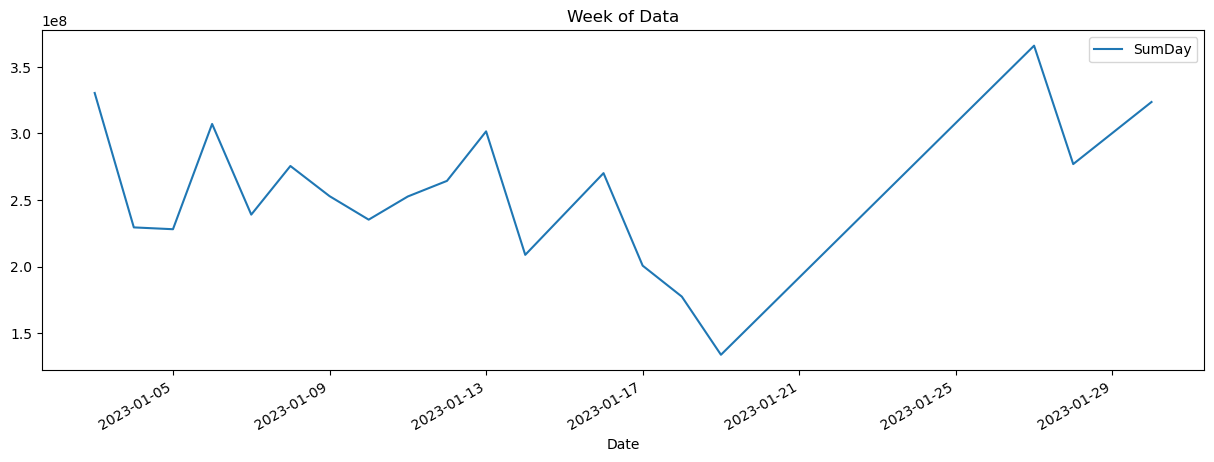

In [18]:
df.loc[(df.index>='2023-01-01') & (df.index<= '2023-01-30')].plot(figsize=(15,5),title='Week of Data')
plt.show()

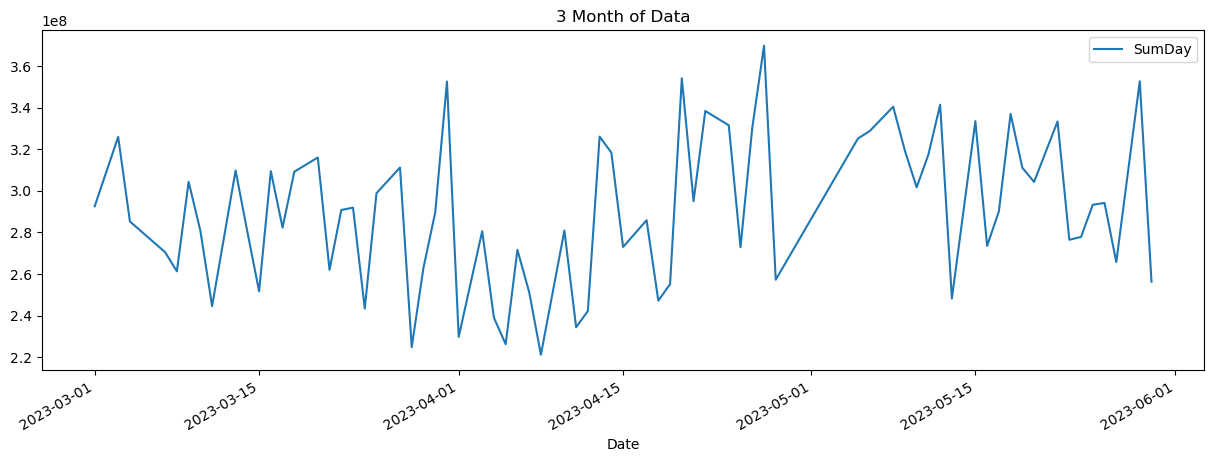

In [19]:
df.loc[(df.index>='2023-03-01') & (df.index<= '2023-05-30')].plot(figsize=(15,5),title='3 Month of Data')
plt.show()

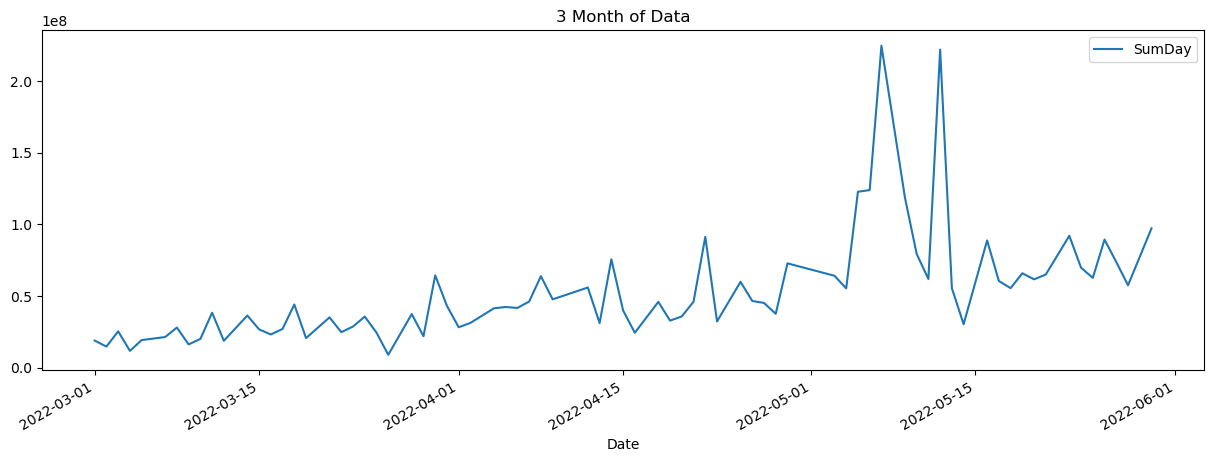

In [20]:
df.loc[(df.index>='2022-03-01') & (df.index<= '2022-05-30')].plot(figsize=(15,5),title='3 Month of Data')
plt.show()

# APPROACH 1 
## FEATURE CREATION 

In [21]:
def create_features(df):
    '''
    Create time features based on time index
    '''
    df['dayofweek']=df.index.dayofweek
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['dayofyear']=df.index.dayofyear

    return df 
# day of week: 0= Monday, 6 = Sunday 
df=create_features(df)
df

,SumDay,dayofweek,quarter,month,dayofyear
Date,,,,,
2023-07-06,314314000,3,3,7,187
2023-07-05,203742000,2,3,7,186
2023-07-04,266953000,1,3,7,185
2023-07-03,325047000,0,3,7,184
2023-07-01,236404000,5,3,7,182
...,...,...,...,...,...
2022-02-14,2496756,0,1,2,45
2022-02-13,2237560,6,1,2,44
2022-02-12,5990040,5,1,2,43


## VISUALIZE FEATURES 

Text(0.5, 1.0, 'Sales by Day of Week ')

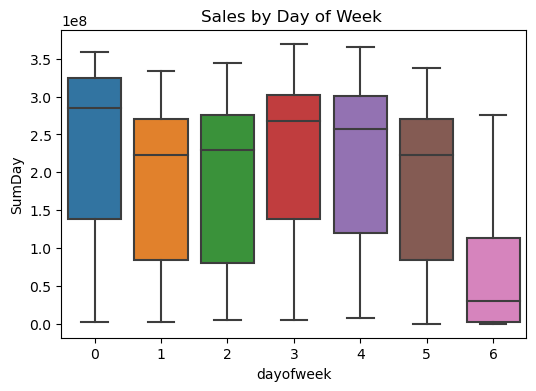

In [22]:
fig,ax = plt.subplots(figsize=(6,4))
sns.boxplot(data=df,x='dayofweek',y='SumDay')
ax.set_title('Sales by Day of Week ')

Text(0.5, 1.0, 'Sales by Month')

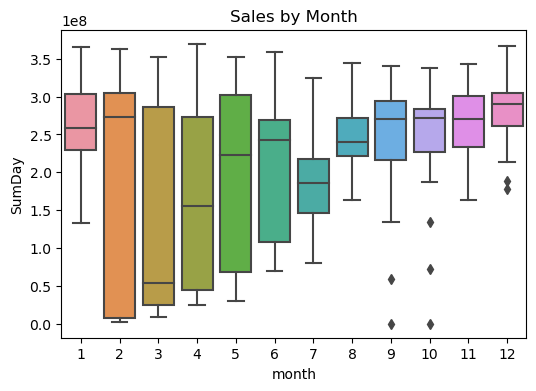

In [23]:
fig,ax = plt.subplots(figsize=(6,4))
sns.boxplot(data=df,x='month',y='SumDay')
ax.set_title('Sales by Month')

Text(0.5, 1.0, 'Sales by Quarter')

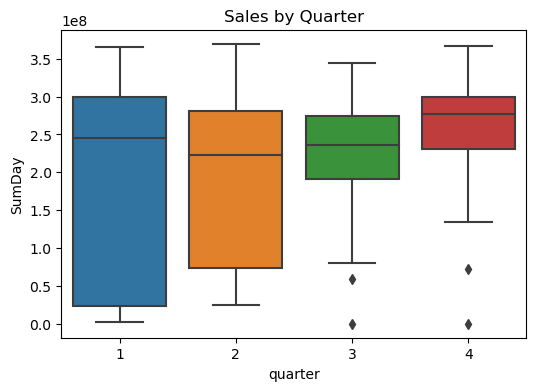

In [24]:
fig,ax = plt.subplots(figsize=(6,4))
sns.boxplot(data=df,x='quarter',y='SumDay')
ax.set_title('Sales by Quarter')

## BUILD MODEL 

In [25]:
## IMPLEMENT LAG FEATURES 
#target_map = df['SumDay'].to_dict()
#df['lag1']= (df.index-pd.Timedelta('28 days')).map(target_map)
#df['lag2']= (df.index-pd.Timedelta('56 days')).map(target_map)
#df['lag3']= (df.index-pd.Timedelta('84 days')).map(target_map)
#df

In [26]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month']
TARGET = 'SumDay'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\620570975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek']=df.index.dayofweek
C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\620570975.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter']=df.index.quarter
C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\620570975.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [27]:
# TEST XGBOOST LATER === DOWNLOAD
reg = xgb.XGBRegressor(base_score=0.5, booster='gblinear',    
                       n_estimators=1000,
                       early_stopping_rounds=30,
                       objective='reg:squarederror',
                       max_depth=6,
                       learning_rate=0.05)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[10:30:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth" } are not used.

[0]	validation_0-rmse:177854606.09759	validation_1-rmse:259537656.91800
[100]	validation_0-rmse:99016638.22924	validation_1-rmse:147945269.79384
[200]	validation_0-rmse:98244594.51836	validation_1-rmse:144860604.16036
[300]	validation_0-rmse:97995596.40446	validation_1-rmse:142924030.43255
[400]	validation_0-rmse:97899262.17230	validation_1-rmse:141892629.18739
[500]	validation_0-rmse:97850076.35137	validation_1-rmse:141380947.14458
[600]	validation_0-rmse:97816151.07742	validation_1-rmse:141156611.90115
[700]	validation_0-rmse:97788044.13667	validation_1-rmse:141083619.38276
[757]	validation_0-rmse:97773508.08237	validation_1-rmse:141084651.65383


XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

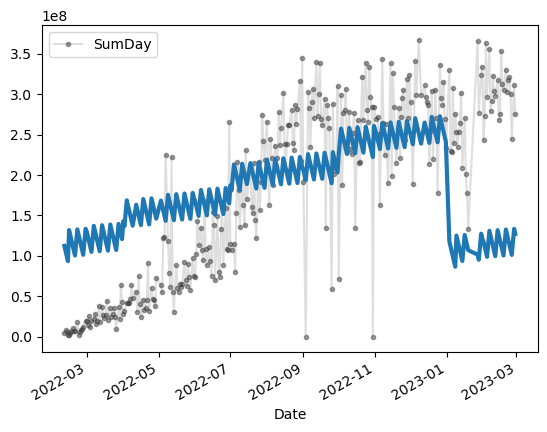

In [29]:
y_fit=pd.Series(reg.predict(X_train),index=X_train.index)
ax= y_train.plot(**plot_params, alpha=0.5)
ax=y_fit.plot(ax=ax, linewidth=3, color='C0')
ax.legend()

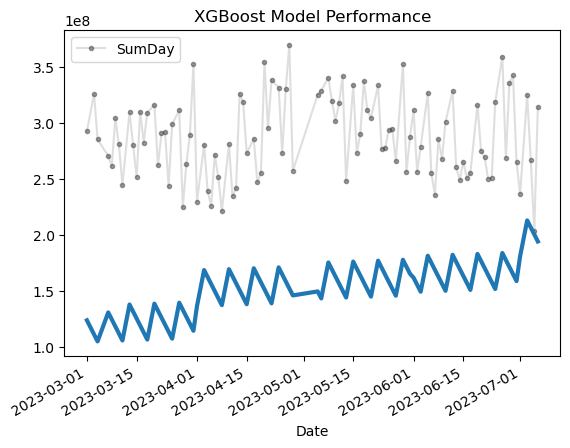

In [30]:
y_pred= pd.Series(reg.predict(X_test),index=X_test.index)
ax= y_test.plot(**plot_params, alpha=0.5)
ax=y_pred.plot(ax=ax, linewidth=3, color='C0')
ax.set_title('XGBoost Model Performance')
ax.legend()


In [34]:
reg.intercept_

array([95558500.])

In [33]:
reg.coef_

array([  115125., -6381700., 25585700.,  2771450.])

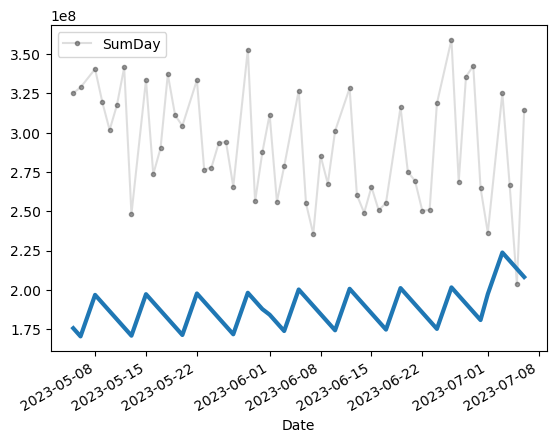

In [236]:
y_pred= pd.Series(reg.predict(X_test),index=X_test.index)
ax= y_test.plot(**plot_params, alpha=0.5)
ax=y_pred.plot(ax=ax, linewidth=3, color='C0')
ax.legend()

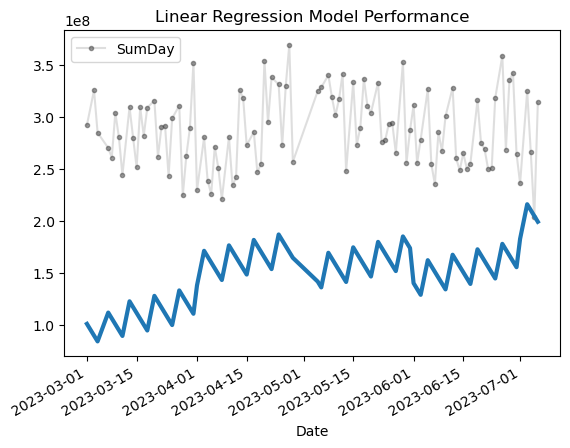

In [35]:
# from sklearn.linear_model import LinearRegression 
model= LinearRegression()
model.fit(X_train,y_train)
y_pred= pd.Series(model.predict(X_test),index=X_test.index)
ax= y_test.plot(**plot_params, alpha=0.5)
ax=y_pred.plot(ax=ax, linewidth=3, color='C0')
ax.set_title('Linear Regression Model Performance')
ax.legend()

In [37]:
model.coef_

array([   748921.75959601,  -6367694.9260757 ,  60988531.85837054,
       -28106986.76328073])

In [38]:
model.intercept_

92270904.97558713

# APPROACH 2: FB PROPHET MODEL 

# ORIGINAL PART (WITHOUT CUSTOMER RETENTION)

In [39]:
df=day_df
df

,Date,SumDay
0,2023-07-06,314314000
1,2023-07-05,203742000
2,2023-07-04,266953000
3,2023-07-03,325047000
4,2023-07-01,236404000
...,...,...
424,2022-02-14,2496756
425,2022-02-13,2237560
426,2022-02-12,5990040
427,2022-02-11,8553568


In [42]:
meo=pd.DataFrame()
meo['ds']=df['Date']
meo['y']=df['SumDay']
meo.head()

,ds,y
0,2023-07-06,314314000
1,2023-07-05,203742000
2,2023-07-04,266953000
3,2023-07-03,325047000
4,2023-07-01,236404000


In [47]:
m = Prophet.Prophet()
m.fit(meo)

10:51:06 - cmdstanpy - INFO - Chain [1] start processing
10:51:06 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
y_fit=m.predict(meo)
y_fit[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2022-02-10,3.163992e+06,-5.189385e+07,5.660782e+07,-3.075798e+07,-3.075798e+07,-3.075798e+07
1,2022-02-11,-4.532558e+06,-5.264982e+07,4.641701e+07,-2.953675e+07,-2.953675e+07,-2.953675e+07
2,2022-02-12,-3.675110e+07,-8.945116e+07,1.862738e+07,-2.831552e+07,-2.831552e+07,-2.831552e+07
3,2022-02-13,-1.201144e+08,-1.736592e+08,-6.890705e+07,-2.709428e+07,-2.709428e+07,-2.709428e+07
4,2022-02-14,1.729214e+07,-3.356248e+07,7.125345e+07,-2.587305e+07,-2.587305e+07,-2.587305e+07
...,...,...,...,...,...,...,...
410,2023-07-01,2.748733e+08,2.250727e+08,3.251775e+08,2.833089e+08,2.833089e+08,2.833089e+08
411,2023-07-03,3.267183e+08,2.730446e+08,3.771279e+08,2.835531e+08,2.835531e+08,2.835531e+08
412,2023-07-04,2.808734e+08,2.260160e+08,3.345503e+08,2.836752e+08,2.836752e+08,2.836752e+08
413,2023-07-05,2.859635e+08,2.338143e+08,3.386257e+08,2.837973e+08,2.837973e+08,2.837973e+08


In [49]:
FUTURE_TIME=4
future = m.make_future_dataframe(periods=FUTURE_TIME, 
                                freq='M')
#future dataframe chi co cot ds-> cot y trong => need to predict 
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']].tail(FUTURE_TIME)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
415,2023-07-31,3.301373e+08,2.795370e+08,3.815525e+08,2.869721e+08,2.858582e+08,2.881941e+08
416,2023-08-31,3.246793e+08,2.706564e+08,3.767000e+08,2.907573e+08,2.872013e+08,2.945070e+08
417,2023-09-30,2.859849e+08,2.318804e+08,3.376630e+08,2.944205e+08,2.873429e+08,3.018496e+08
418,2023-10-31,2.954039e+08,2.417455e+08,3.482427e+08,2.982058e+08,2.871278e+08,3.093649e+08


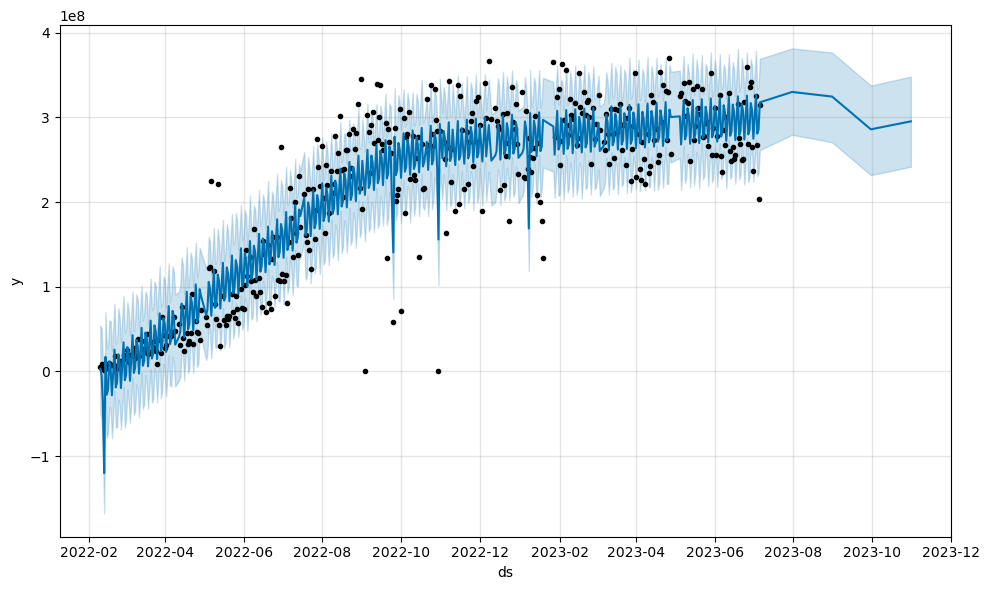

In [50]:
fig1=m.plot(forecast)

## IDEA: THIS IS POTENTIALLY GOOD MODEL: VI NO CLOSE TO REALITY: FLUCTUATE MOST ABOUT 200TR-400TR (250-350TR) . Bu tru variation len xuong cung ra gia tri gan dung cua no 

## INVESTIGATE FURTHER INTO MODEL PERFORMANCE 

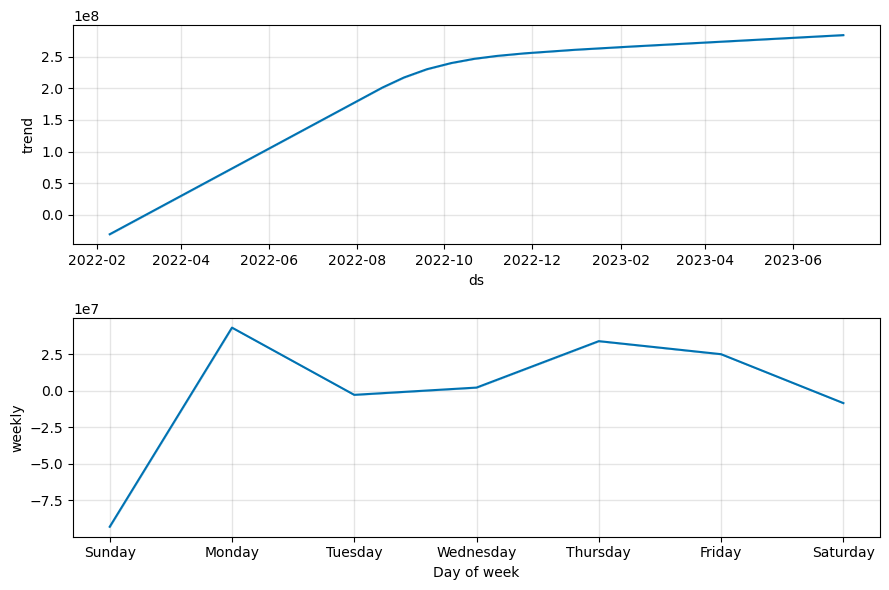

In [51]:
m.plot_components(y_fit)
plt.show()

In [52]:
df=df.set_index('Date')

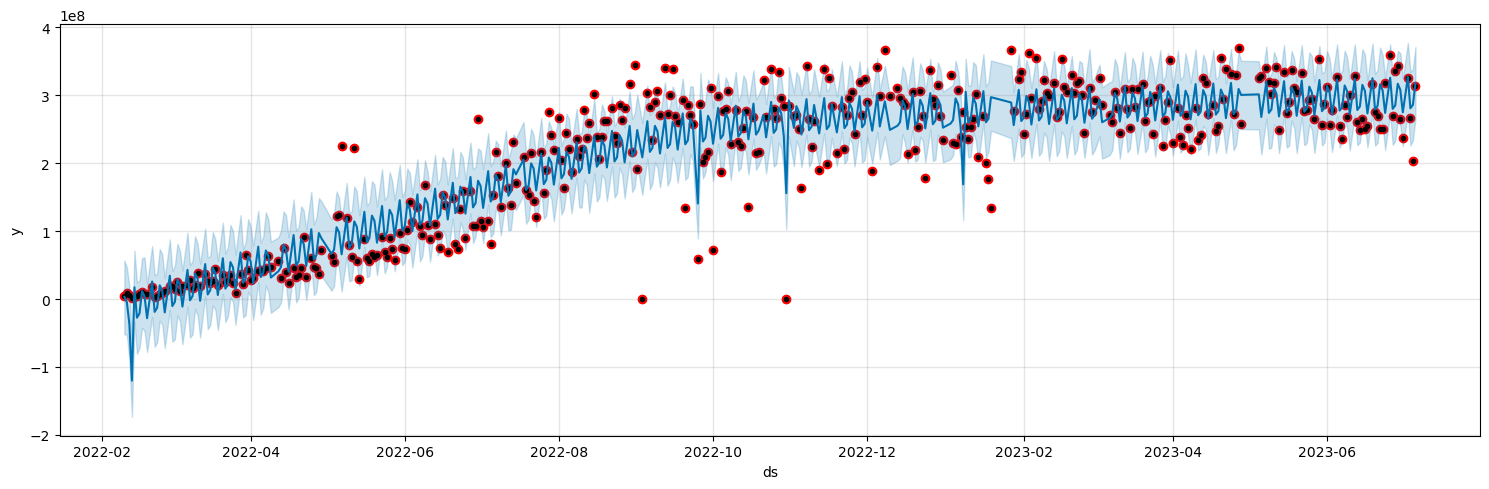

In [53]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter (df.index, meo['y'],color='r')
fig =m.plot(y_fit ,ax=ax)

In [54]:
ax= y_train.plot(**plot_params, alpha=0.5)
ax=y_fit.plot(ax=ax, linewidth=3, color='C0')
ax.legend()

Error in callback <function _draw_all_if_interactive at 0x000001EDC039C700> (for post_execute):


OverflowError: int too big to convert

OverflowError: int too big to convert

<Figure size 640x480 with 1 Axes>

In [55]:
np.sqrt(mean_squared_error(y_true=meo['y'],y_pred=y_fit['yhat']))

186642184.941682

## ADDING BROADCASTS -- HOLIDAYS 

### Variable 'holiday' la Category Split for ads
#### Count=1 => Broadcast 1 
#### Count=2 => Broadcast 2 
#### Count=3/4 => Broadcast 3

In [56]:
broadcast = pd.read_csv('BroadCast.csv')
broadcast=broadcast.rename(columns={'Time':'ds'})
ad= broadcast['ds'].value_counts().to_frame()
ad = ad.reset_index()
ad=ad.rename(columns={'ds':'Count'})
ad=ad.rename(columns={'index':'ds'})
ad['holiday']=0
for i in range(len(ad)):
    if ad['Count'][i]==1:
        ad['holiday'][i]='Broadcast1'
    elif ad['Count'][i]==2:
        ad['holiday'][i]='Broadcast2'
    else:
        ad['holiday'][i]='Broadcast3'
ad=ad.drop('Count',axis=1)
ad

C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\2384011530.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad['holiday'][i]='Broadcast3'


,ds,holiday
0,2023-04-07,Broadcast3
1,2023-03-31,Broadcast3
2,2023-04-21,Broadcast3
3,2023-04-14,Broadcast3
4,2023-05-19,Broadcast3
5,2023-03-24,Broadcast3
6,2023-06-16,Broadcast3
7,2023-06-09,Broadcast3
8,2023-03-17,Broadcast3
9,2023-05-05,Broadcast3


In [57]:
model_with_broadcast= Prophet.Prophet(holidays=ad)
model_with_broadcast.fit(meo)

10:51:25 - cmdstanpy - INFO - Chain [1] start processing
10:51:25 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
y_with_broadcast_fit=m.predict(meo)
y_with_broadcast_fit[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2022-02-10,3.163992e+06,-4.980984e+07,5.068801e+07,-3.075798e+07,-3.075798e+07,-3.075798e+07
1,2022-02-11,-4.532558e+06,-5.909723e+07,4.966571e+07,-2.953675e+07,-2.953675e+07,-2.953675e+07
2,2022-02-12,-3.675110e+07,-8.952291e+07,1.668743e+07,-2.831552e+07,-2.831552e+07,-2.831552e+07
3,2022-02-13,-1.201144e+08,-1.736018e+08,-6.597696e+07,-2.709428e+07,-2.709428e+07,-2.709428e+07
4,2022-02-14,1.729214e+07,-3.792225e+07,6.534787e+07,-2.587305e+07,-2.587305e+07,-2.587305e+07
...,...,...,...,...,...,...,...
410,2023-07-01,2.748733e+08,2.219580e+08,3.312781e+08,2.833089e+08,2.833089e+08,2.833089e+08
411,2023-07-03,3.267183e+08,2.690108e+08,3.771585e+08,2.835531e+08,2.835531e+08,2.835531e+08
412,2023-07-04,2.808734e+08,2.305281e+08,3.350156e+08,2.836752e+08,2.836752e+08,2.836752e+08
413,2023-07-05,2.859635e+08,2.355469e+08,3.328308e+08,2.837973e+08,2.837973e+08,2.837973e+08


In [59]:
#178 days from 2023-07-06 to 2023-12-31
# future time =4, freq='M'
FUTURE_TIME=178
future = model_with_broadcast.make_future_dataframe(periods=FUTURE_TIME) 
#future dataframe chi co cot ds-> cot y trong => need to predict 
forecast_with_broadcast = model_with_broadcast.predict(future)
forecast_with_broadcast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
588,2023-12-27,3.114981e+08,2.561902e+08,3.722539e+08,3.085028e+08,2.875211e+08,3.304476e+08
589,2023-12-28,3.403719e+08,2.837315e+08,3.965108e+08,3.086406e+08,2.874793e+08,3.308161e+08
590,2023-12-29,3.344765e+08,2.754457e+08,3.893990e+08,3.087784e+08,2.874440e+08,3.310721e+08
591,2023-12-30,3.017790e+08,2.413095e+08,3.580741e+08,3.089162e+08,2.874086e+08,3.313231e+08
592,2023-12-31,2.146739e+08,1.604953e+08,2.725397e+08,3.090540e+08,2.873733e+08,3.315734e+08


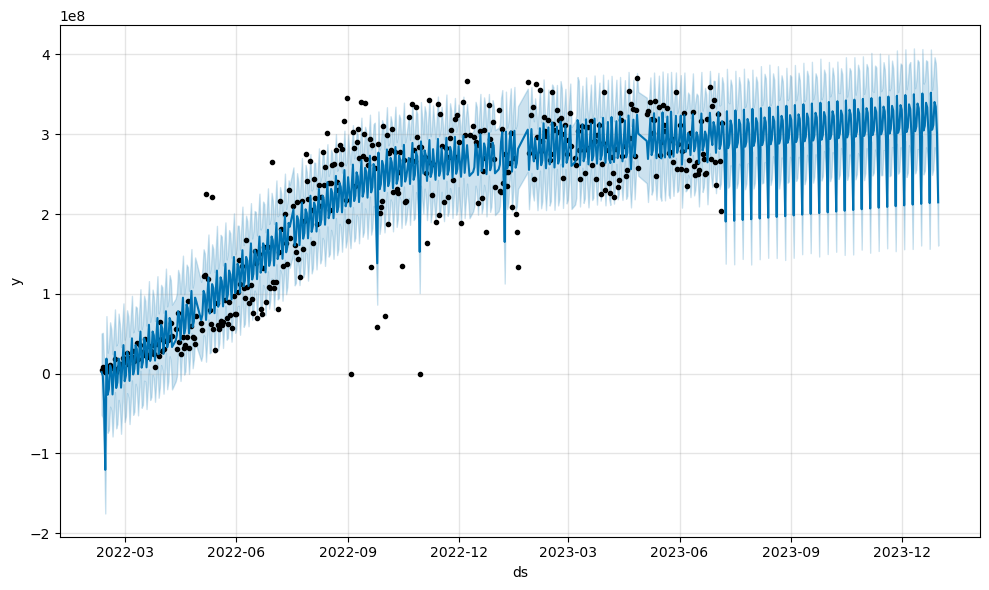

In [60]:
fig1=model_with_broadcast.plot(forecast_with_broadcast)

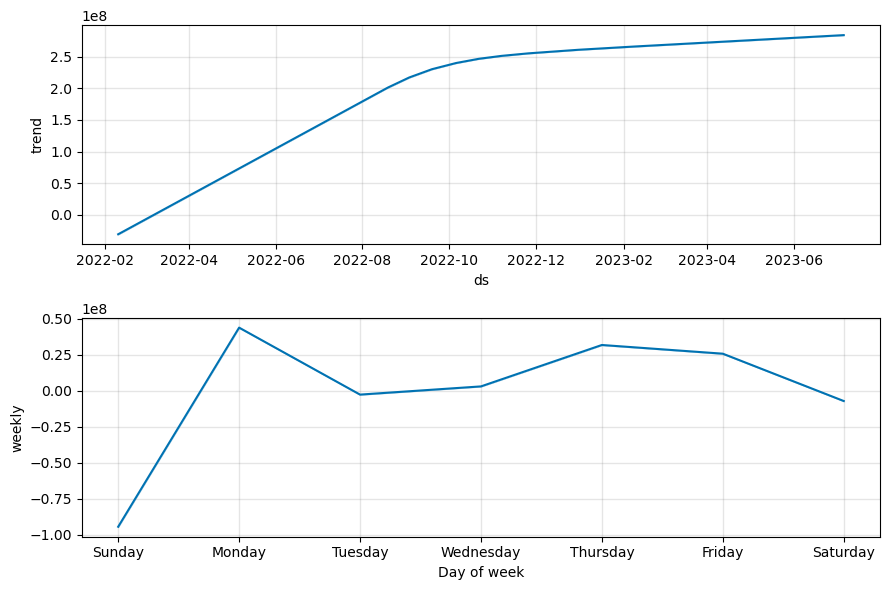

In [61]:
fig2= model_with_broadcast.plot_components(y_with_broadcast_fit)

In [62]:
np.sqrt(mean_squared_error(y_true=meo['y'],y_pred=y_with_broadcast_fit['yhat']))

186642184.941682

#### Nhan xet: RMSE co improvement: tu 192tr xuong 186tr

## CALCULATE PREDICTION FOR WHOLE YEAR 2023 

In [63]:
# Sale bat dau tu 2023-01-03 den 2023-12-31. Truoc do ko hoat dong: nghi le 
forecast_with_broadcast[(forecast_with_broadcast['ds']>='2023-01-03') & (forecast_with_broadcast['ds']<='2023-12-31')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Broadcast1,Broadcast1_lower,Broadcast1_upper,Broadcast2,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
268,2023-01-03,2.586120e+08,2.034678e+08,3.081165e+08,2.586120e+08,2.586120e+08,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.688148e+06,-2.688148e+06,-2.688148e+06,0.0,0.0,0.0,2.559238e+08
269,2023-01-04,2.587636e+08,2.097117e+08,3.126794e+08,2.587636e+08,2.587636e+08,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.995309e+06,2.995309e+06,2.995309e+06,0.0,0.0,0.0,2.617589e+08
270,2023-01-05,2.589152e+08,2.370367e+08,3.455672e+08,2.589152e+08,2.589152e+08,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.173139e+07,3.173139e+07,3.173139e+07,0.0,0.0,0.0,2.906466e+08
271,2023-01-06,2.590669e+08,2.505821e+08,3.553549e+08,2.590669e+08,2.590669e+08,0.0,0.0,0.0,1.782586e+07,...,1.782586e+07,1.782586e+07,1.782586e+07,2.569810e+07,2.569810e+07,2.569810e+07,0.0,0.0,0.0,3.025908e+08
272,2023-01-07,2.592185e+08,1.983576e+08,3.028829e+08,2.592185e+08,2.592185e+08,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-7.137164e+06,-7.137164e+06,-7.137164e+06,0.0,0.0,0.0,2.520813e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,2023-12-27,3.085028e+08,2.561902e+08,3.722539e+08,2.875211e+08,3.304476e+08,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.995309e+06,2.995309e+06,2.995309e+06,0.0,0.0,0.0,3.114981e+08
589,2023-12-28,3.086406e+08,2.837315e+08,3.965108e+08,2.874793e+08,3.308161e+08,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.173139e+07,3.173139e+07,3.173139e+07,0.0,0.0,0.0,3.403719e+08
590,2023-12-29,3.087784e+08,2.754457e+08,3.893990e+08,2.874440e+08,3.310721e+08,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.569810e+07,2.569810e+07,2.569810e+07,0.0,0.0,0.0,3.344765e+08
591,2023-12-30,3.089162e+08,2.413095e+08,3.580741e+08,2.874086e+08,3.313231e+08,0.0,0.0,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-7.137164e+06,-7.137164e+06,-7.137164e+06,0.0,0.0,0.0,3.017790e+08


In [64]:
len(forecast_with_broadcast[(forecast_with_broadcast['ds']>='2023-01-03') & (forecast_with_broadcast['ds']<='2023-12-31')])

325

In [65]:
forecast_with_broadcast[(forecast_with_broadcast['ds']>='2023-01-03') & (forecast_with_broadcast['ds']<='2023-12-31')]['yhat']

268    2.559238e+08
269    2.617589e+08
270    2.906466e+08
271    3.025908e+08
272    2.520813e+08
           ...     
588    3.114981e+08
589    3.403719e+08
590    3.344765e+08
591    3.017790e+08
592    2.146739e+08
Name: yhat, Length: 325, dtype: float64

In [66]:
np.sum(forecast_with_broadcast[(forecast_with_broadcast['ds']>='2023-01-03') & (forecast_with_broadcast['ds']<='2023-12-31')]['yhat'])


95067429255.4622

### Nhan xet: ca nam 2023, theo model nay, ban duoc 95 ti, trung binh ngay la 95 ti/325 ngay hoat dong = 290Tr/ngay.

# NEW PART: FACTOR IN CUSTOMER RETENTION 

In [67]:
df=pd.read_csv('onlinesale.csv',low_memory=False)
df=df[df['CallStatus']=='Completed']
phoneNum_df = pd.DataFrame(columns=["PhoneNumber","Time","Type"])
phoneNum_df["PhoneNumber"] = df["CalledPhone"].unique()
phoneNum_df.Type =0 
phoneNum_df.Time = 0
features=['LastestCall','TotalAmount',"CalledPhone"]
new_df=df[features]
new_df['LastestCall']=pd.to_datetime(new_df['LastestCall']).dt.date
new_df.CustomerType=0
day_df=pd.DataFrame()
day_df['Date']=new_df['LastestCall'].unique()[::-1]
day_df['SumDay']=0
day_df["Customer1"]=0
day_df["Customer2"]=0
day_df["Customer3"]=0
day_df.head()

C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\1336256006.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LastestCall']=pd.to_datetime(new_df['LastestCall']).dt.date


,Date,SumDay,Customer1,Customer2,Customer3
0,2022-02-10,0,0,0,0
1,2022-02-11,0,0,0,0
2,2022-02-12,0,0,0,0
3,2022-02-13,0,0,0,0
4,2022-02-14,0,0,0,0


In [68]:
temp_df = new_df[new_df.LastestCall == day_df.Date[0] ]
#dataframe date = 2022-02-10 cua new_df
index_out = 0
for phone in temp_df.CalledPhone:    
    index = phoneNum_df.index[phoneNum_df['PhoneNumber'] == phone].tolist()[0]
    phoneNum_df.Time[index] +=1
    if phoneNum_df.Time[index] in range(1,4):
        phoneNum_df.Type[index] = 1
    elif phoneNum_df.Time[index] in range(4,15):
        phoneNum_df.Type[index] = 2
    elif phoneNum_df.Time[index] >= 15:
        phoneNum_df.Type[index] = 3
for i in range(len(day_df)):
    day_df.Customer1[i] = len(phoneNum_df[phoneNum_df.Type == 1])
    day_df.Customer2[i] = len(phoneNum_df[phoneNum_df.Type == 2])
    day_df.Customer3[i] = len(phoneNum_df[phoneNum_df.Type == 3])
    temp_df = new_df[new_df.LastestCall == day_df.Date[i] ]
    #dataframe date = 2022-02-10 cua new_df
    for phone in temp_df.CalledPhone:    
        try:
            index = phoneNum_df.index[phoneNum_df['PhoneNumber'] == phone].tolist()[0]
            phoneNum_df.Time[index] +=1
            if phoneNum_df.Time[index] in range(1,4):
                phoneNum_df.Type[index] = 1
            elif phoneNum_df.Time[index] in range(4,15):
                phoneNum_df.Type[index] = 2
            elif phoneNum_df.Time[index] >= 15:
                phoneNum_df.Type[index] = 3
        except:
            print("Phone num has problem:", phone)
for i in range(len(day_df)):
    day_df.SumDay[i]=np.sum(new_df[new_df["LastestCall"]==day_df['Date'][i]].TotalAmount)
day_df.head()

C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\660453130.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phoneNum_df.Time[index] +=1
C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\660453130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phoneNum_df.Type[index] = 1
C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\660453130.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df.Customer1[i] = len(phoneNum_df[phoneNum_df

Phone num has problem: nan
Phone num has problem: nan
Phone num has problem: nan
Phone num has problem: nan


C:\Users\LAVX\AppData\Local\Temp\ipykernel_14860\660453130.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df.SumDay[i]=np.sum(new_df[new_df["LastestCall"]==day_df['Date'][i]].TotalAmount)


,Date,SumDay,Customer1,Customer2,Customer3
0,2022-02-10,4890432,12,0,0
1,2022-02-11,8553568,12,0,0
2,2022-02-12,5990040,22,0,0
3,2022-02-13,2237560,30,0,0
4,2022-02-14,2496756,33,0,0


In [69]:
meo=pd.DataFrame()
meo['ds']=day_df['Date']
meo['y']=day_df['SumDay']
#meo['Customer1']=day_df['Customer1']
#meo['Customer2']=day_df['Customer2']
#meo['Customer3']=day_df['Customer3']
meo['Customer']=day_df['Customer1'] + day_df['Customer2']*2 + day_df['Customer3']*15
meo.head()

,ds,y,Customer
0,2022-02-10,4890432,12
1,2022-02-11,8553568,12
2,2022-02-12,5990040,22
3,2022-02-13,2237560,30
4,2022-02-14,2496756,33


In [70]:
meo.shape

(429, 3)

In [71]:
m = Prophet.Prophet(holidays=ad)
#m.add_regressor('Customer1')
#m.add_regressor('Customer2')
#m.add_regressor('Customer3')
m.add_regressor('Customer')
m.fit(meo)


10:56:52 - cmdstanpy - INFO - Chain [1] start processing
10:56:52 - cmdstanpy - INFO - Chain [1] done processing


10:57:02 - cmdstanpy - INFO - Chain [1] start processing
10:57:02 - cmdstanpy - INFO - Chain [1] done processing


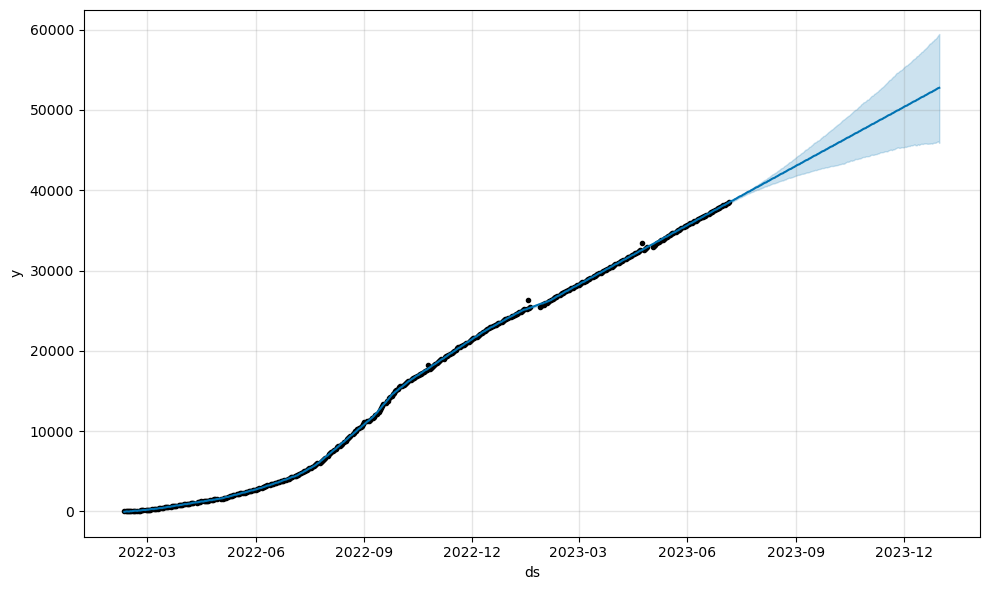

In [72]:
customer_year=pd.DataFrame()
customer_year['ds']=day_df['Date']
customer_year['y']=meo['Customer']
m_customer=Prophet.Prophet()
m_customer.fit(customer_year)
future_customer=m_customer.make_future_dataframe(periods=178)
forecast_customer=m_customer.predict(future_customer)
#forecast_customer[['ds','yhat']]
fig_customer=m_customer.plot(forecast_customer)

## FORECAST FOR CUSTOMER 1 & 2 & 3 
customer1_year= pd.DataFrame()
customer1_year['ds']=day_df['Date']
customer1_year['y']=day_df['Customer1']
m_customer1=Prophet.Prophet()
m_customer1.fit(customer1_year)
future_customer1 = m_customer1.make_future_dataframe(periods = 178)
forecast_customer1=m_customer1.predict(future_customer1)
#forecast_customer1[['ds','yhat']]
fig_customer1= m_customer1.plot(forecast_customer1)

customer2_year= pd.DataFrame()
customer2_year['ds']=day_df['Date']
customer2_year['y']=day_df['Customer2']
m_customer2=Prophet.Prophet()
m_customer2.fit(customer2_year)
future_customer2 = m_customer2.make_future_dataframe(periods = 178)
forecast_customer2=m_customer2.predict(future_customer2)
#forecast_customer2[['ds','yhat']]
fig_customer2= m_customer2.plot(forecast_customer2)

customer3_year= pd.DataFrame()
customer3_year['ds']=day_df['Date']
customer3_year['y']=day_df['Customer3']
m_customer3=Prophet.Prophet()
m_customer3.fit(customer3_year)
future_customer3 = m_customer3.make_future_dataframe(periods = 178)
forecast_customer3=m_customer3.predict(future_customer3)
#forecast_customer3[['ds','yhat']]
fig_customer3= m_customer3.plot(forecast_customer3)

Text(0.5, 1.0, 'Prophet Prediction of Daily Sales Over Time ')

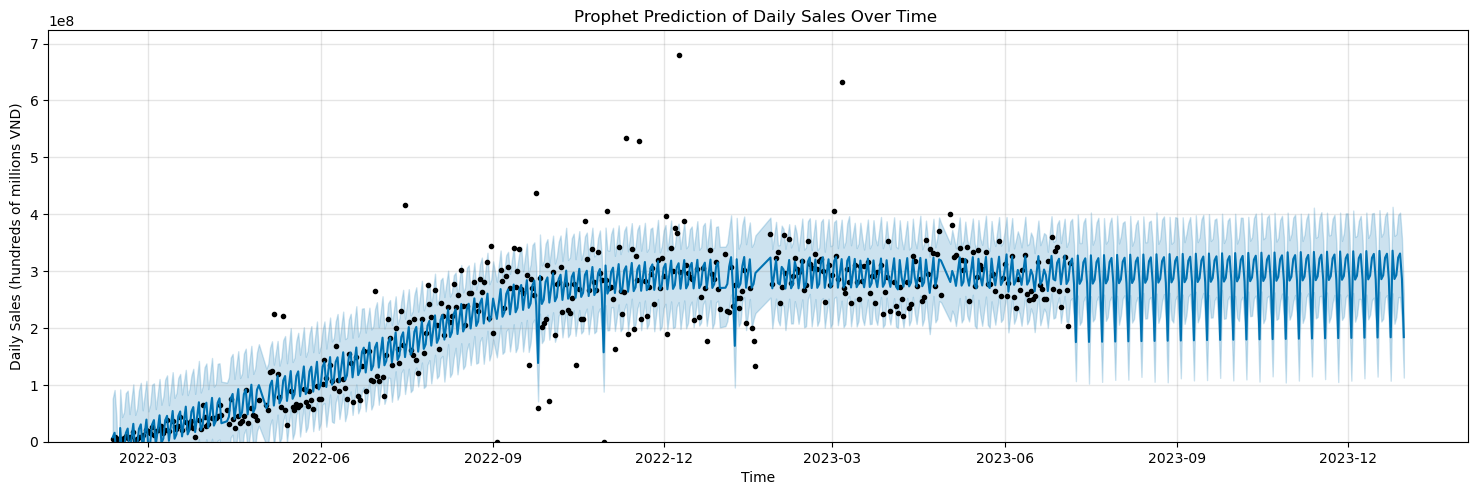

In [90]:
future = m.make_future_dataframe(periods=178)
#future['Customer1']=forecast_customer1['yhat']
#future['Customer2']=forecast_customer2['yhat']
#future['Customer3']=forecast_customer3['yhat']
future['Customer']=forecast_customer['yhat']
forecast=m.predict(future)
fig=m.plot(forecast, figsize=(15,5))
plt.ylim(ymin=0)
plt.xlabel('Time')
plt.ylabel('Daily Sales (hundreds of millions VND)')
plt.title('Prophet Prediction of Daily Sales Over Time ')


In [102]:
m.

AttributeError: 'Prophet' object has no attribute 'summary'

In [97]:
dem = forecast[['ds','yhat']]
dem.head()

,ds,yhat
0,2022-02-10,7.752042e+06
1,2022-02-11,1.577599e+07
2,2022-02-12,-2.814794e+07
3,2022-02-13,-1.292352e+08
4,2022-02-14,2.410356e+07


In [92]:
dem=dem.set_index('ds')
dem.index=pd.to_datetime(dem.index)
dem.head()

,yhat
ds,
2022-02-10,7.752042e+06
2022-02-11,1.577599e+07
2022-02-12,-2.814794e+07
2022-02-13,-1.292352e+08
2022-02-14,2.410356e+07


In [98]:
#dem_2023 = dem[(dem['ds']>='2023-12') & (dem['ds']<'2023-12')]
#np.sum(dem_2023['yhat'])


0.0

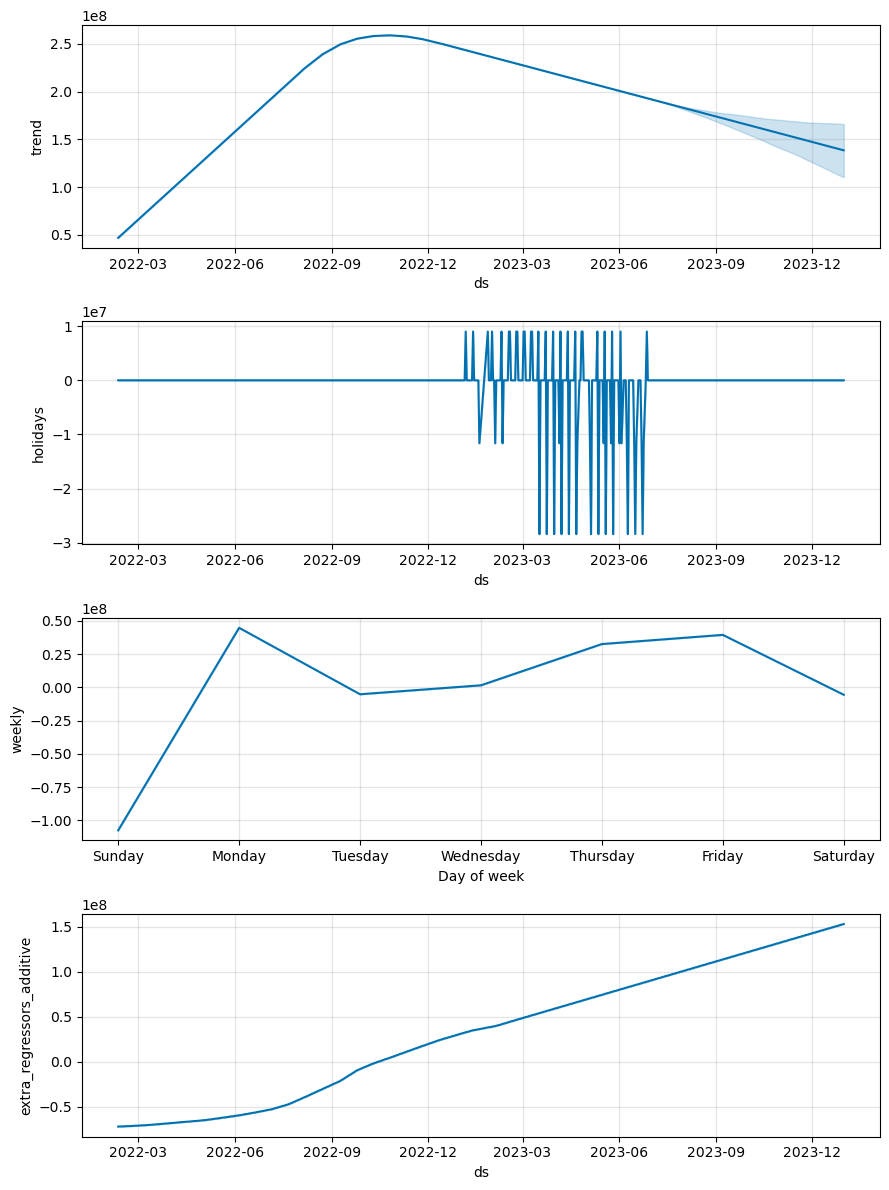

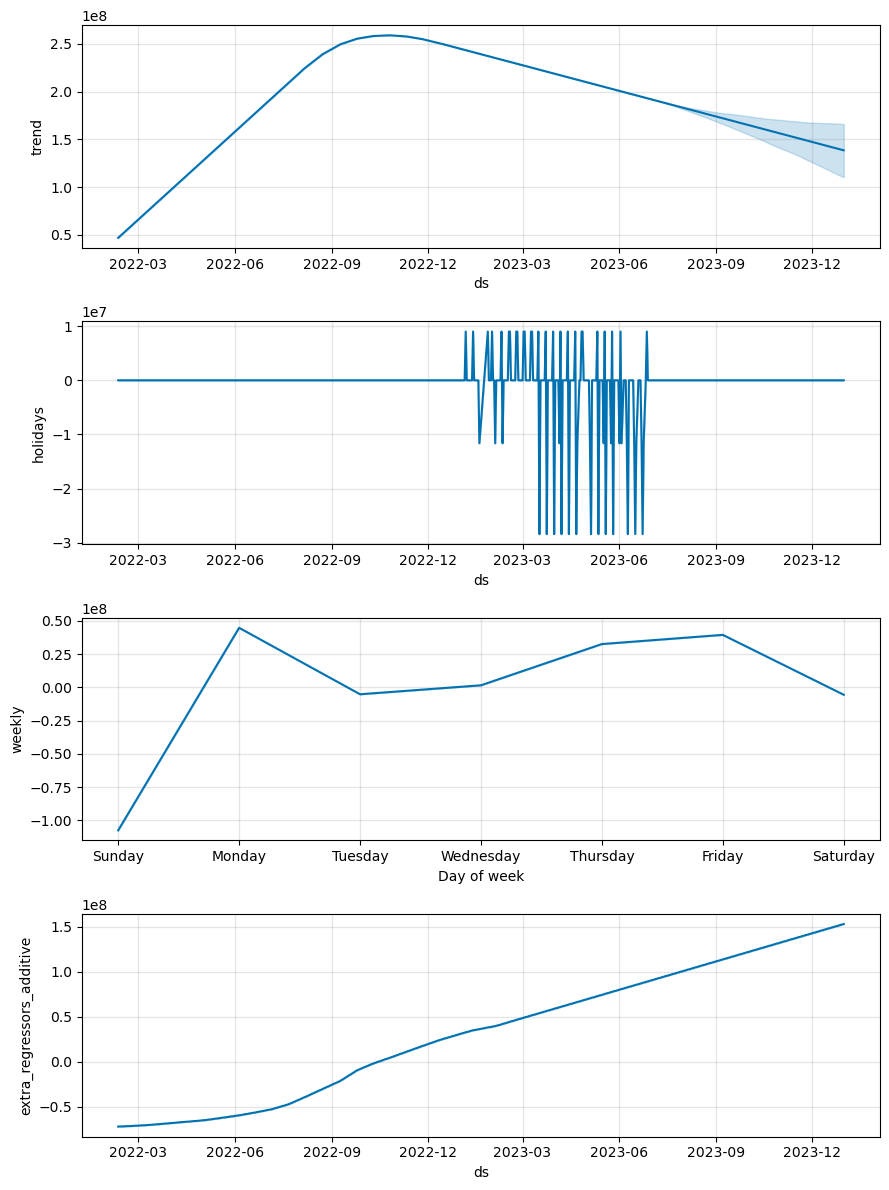

In [99]:
#forecast[['ds','yhat']]
m.plot_components(forecast)

### PREDICTION FOR WHOLE 2023 YEAR 


In [100]:
np.sum(forecast[(forecast['ds']>='2023-01-03') & (forecast['ds']<='2023-12-31')]['yhat'])
# nhan xet: neu su dung Customer1 va Customer2, bo Customer3 => 96.7 ti; neu su dung ca 3 features => 92 ti ==> NGUYEN NHAN: CHUA STANDARDIZE DATA 


95288512033.45938

In [101]:
y_fit=m.predict(meo)
np.sqrt(mean_squared_error(y_true=meo['y'],y_pred=y_fit['yhat']))
# Improvement: fit hon nhieu vcl: RMSE giam xuong con 55 tr 

55422297.02191603

# EVALUATE WITH NEW METRICS


In [21]:
meo=pd.DataFrame()
meo['ds']=day_df['Date']
meo['y']=day_df['SumDay']
#meo['Customer1']=day_df['Customer1']
#meo['Customer2']=day_df['Customer2']
#meo['Customer3']=day_df['Customer3']
meo['Customer']=day_df['Customer1']*1 + day_df['Customer2']*2 + day_df['Customer3']*15
meo=meo.set_index('ds')
meo.index=pd.to_datetime(meo.index)
meo.head()

,y
ds,
2022-02-10,4890432
2022-02-11,8553568
2022-02-12,5990040
2022-02-13,2237560
2022-02-14,2496756


### 75: 25 TRAIN TEST SPLIT 

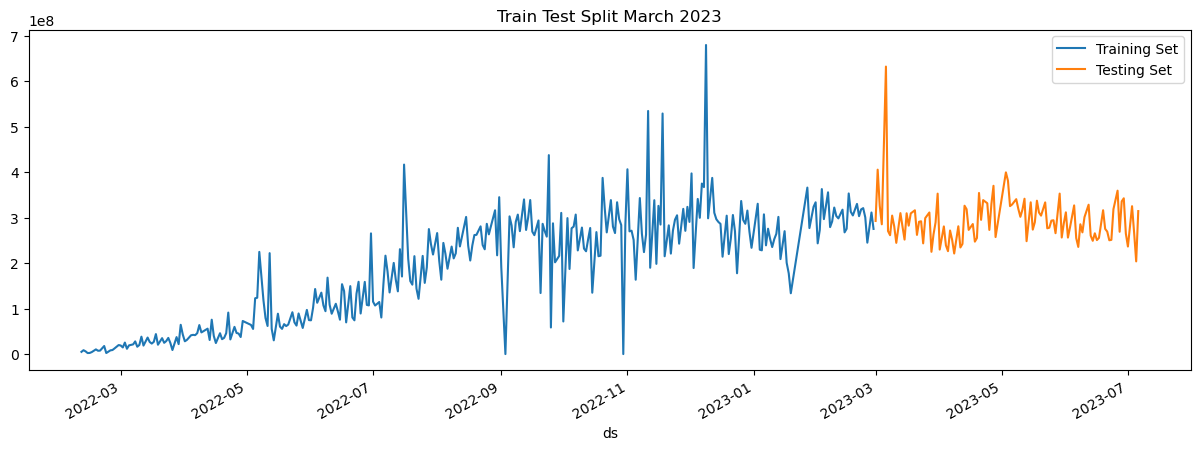

In [29]:
meo_train = meo.loc[meo.index<'2023-03']
meo_test=meo.loc[meo.index>='2023-03']
fig,ax =plt.subplots(figsize=(15,5))
meo_train.plot(ax=ax, label='Training Set',legend='Train')
ax.legend(['Training Set','Testing Set'])
meo_test.plot(ax=ax,label='Testing Set',legend='Test')
ax.legend(['Training Set','Testing Set'])
plt.title('Train Test Split March 2023')
plt.show()


In [331]:
meo_train=meo_train.reset_index()
meo_test=meo_test.reset_index()


In [332]:
# PREPARE (CUSTOMER FORECAST) TO FIT INTO THE MODEL 
m_customer=Prophet.Prophet(holidays=ad)
customer_df=pd.DataFrame()
customer_df['ds']=meo_train['ds']
customer_df['y']=meo_train['Customer']
m_customer.fit(customer_df)
customer_test_frame=pd.DataFrame()
customer_test_frame['ds']=meo_test['ds']
customer_forecast= m_customer.predict(customer_test_frame)
#customer_forecast[['ds','yhat']]

11:02:22 - cmdstanpy - INFO - Chain [1] start processing
11:02:22 - cmdstanpy - INFO - Chain [1] done processing


In [333]:
m=Prophet.Prophet(holidays=ad)
m.add_regressor('Customer')
m.fit(meo_train)
m_test_frame=pd.DataFrame()
m_test_frame['ds']=meo_test['ds']
#m_test_frame['Customer']=meo_test['Customer']
m_test_frame['Customer']=customer_forecast['yhat']
m_forecast=m.predict(m_test_frame)
m_forecast[['ds','yhat']]


11:02:23 - cmdstanpy - INFO - Chain [1] start processing
11:02:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
0,2023-03-01,2.926264e+08
1,2023-03-02,3.288675e+08
2,2023-03-03,3.422252e+08
3,2023-03-04,2.829288e+08
4,2023-03-06,3.309124e+08
...,...,...
102,2023-07-01,3.088240e+08
103,2023-07-03,3.568077e+08
104,2023-07-04,3.156321e+08
105,2023-07-05,3.200449e+08


## INTRODUCE NEW METRICS TO EVALUATE: (AVERAGE ERROR OVER TIME) 


### Trong giai đoạn khoảng 4 tháng từ 2023-03-01 đến 2023-07-06, model forecast bán: 


In [334]:
np.sum(m_forecast['yhat'])

33877394215.56155

### Trong giai đoạn khoảng 4 tháng từ 2023-03-01 đến 2023-07-06, thực tế bán: 


In [335]:
np.sum(meo_test['y'])

31436397414

### Intepret con số: mỗi ngày sale predict lệch bao nhiêu

In [336]:
abs(np.sum(m_forecast['yhat'])-np.sum(meo_test['y']))/len(m_forecast)

22813054.220201403

### Đánh giá accuracy: lệch khoảng (34-31=3 tỉ) / (31 tỉ số thực) => Chênh lệch khoảng 9.6% => Accuracy khoảng 90.4%, trên được với accuracy expected là 80% chị Merkle có nói => Kết quả rất tốt rồi 

### Lí do sử dụng metrics mới: vì cần dự đoán sales trong 1 khoảng thời gian mid-term/ long-term, theo 1 tháng/ vài tháng/ 1 năm chứ ko phải short-term theo ngày. Metrics này sẽ hiệu quả hơn vì sẽ đo lường được model có đi theo xu hướng ko theo thời gian  